## Fake News Classifier

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [2]:
df = pd.read_csv("D:\\PYTHON PRACTICE(data_analysis)\\fake_news.csv")

In [3]:
df.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [4]:
df.shape

(6335, 4)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6335 entries, 0 to 6334
Data columns (total 4 columns):
Unnamed: 0    6335 non-null int64
title         6335 non-null object
text          6335 non-null object
label         6335 non-null object
dtypes: int64(1), object(3)
memory usage: 198.0+ KB


## The data set contains no null value

In [6]:
df.label.value_counts()

REAL    3171
FAKE    3164
Name: label, dtype: int64

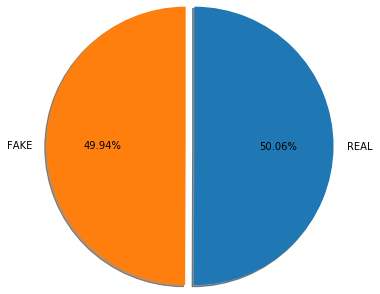

In [7]:
percent = round(df.label.value_counts()/len(df.index)*100,2)

sub=['REAL','FAKE']

plt.axis("equal")
plt.pie(percent , labels=sub,radius=1.6,autopct='%1.2f%%',explode=[0.05,0.05],startangle=90,shadow=True,counterclock=False,pctdistance=0.6)
plt.show()

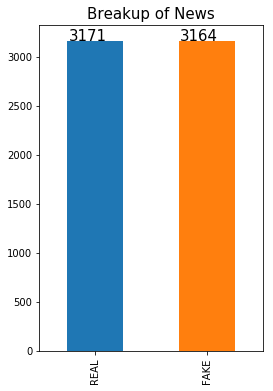

In [8]:
plt.figure(figsize=(4,6))
figx = df['label'].value_counts().plot(kind = 'bar')
plt.title('Breakup of News', fontsize = 15)
for i in figx.patches:
     # get_x pulls left or right; get_height pushes up or down
    figx.text(i.get_x()+.01, i.get_height()+0.3, \
            str(round((i.get_height()), 2)), fontsize=15, color='black',
                rotation=0)

plt.show()

## Feature Engineering

In [9]:
df['title_len'] = [len(str(a)) for a in df['title']]
df['title_len'].describe()

count    6335.000000
mean       65.277664
std        23.733657
min         1.000000
25%        49.000000
50%        64.000000
75%        78.000000
max       289.000000
Name: title_len, dtype: float64

In [10]:
df['text_len'] = [len(str(a)) for a in df['text']]
df['text_len'].describe()

count      6335.000000
mean       4707.250355
std        5090.956446
min           1.000000
25%        1741.500000
50%        3642.000000
75%        6192.000000
max      115372.000000
Name: text_len, dtype: float64

In [11]:
df['label_numeric'] = df['label'].apply(lambda x: 1 if x == "REAL" else 0)

In [12]:
df.head()

,Unnamed: 0,title,text,label,title_len,text_len,label_numeric
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE,28,7518,0
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE,85,2646,0
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL,43,2543,1
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE,84,2660,0
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL,48,1840,1


In [13]:
df.drop('label', axis=1, inplace=True)

In [14]:
X = df.copy()

In [15]:
X.head()

,Unnamed: 0,title,text,title_len,text_len,label_numeric
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",28,7518,0
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,85,2646,0
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,43,2543,1
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",84,2660,0
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,48,1840,1


In [16]:
y = df['label_numeric']

In [17]:
y.head()

0    0
1    0
2    1
3    0
4    1
Name: label_numeric, dtype: int64

In [18]:
X.drop('label_numeric', axis=1, inplace=True)

In [19]:
X.head()

,Unnamed: 0,title,text,title_len,text_len
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",28,7518
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,85,2646
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,43,2543
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",84,2660
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,48,1840


In [20]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, HashingVectorizer

In [21]:
df = df.dropna()

In [22]:
df.head()

,Unnamed: 0,title,text,title_len,text_len,label_numeric
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",28,7518,0
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,85,2646,0
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,43,2543,1
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",84,2660,0
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,48,1840,1


In [23]:
messages=df.copy()

In [24]:
messages.reset_index(inplace=True)

In [25]:
messages.head()

,index,Unnamed: 0,title,text,title_len,text_len,label_numeric
0,0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",28,7518,0
1,1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,85,2646,0
2,2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,43,2543,1
3,3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",84,2660,0
4,4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,48,1840,1


In [26]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
corpus = []
for i in range(0, len(messages)):
    review = re.sub('[^a-zA-Z]', ' ', messages['title'][i]) ## Remove any stop word of special char with space
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

In [27]:
corpus[6]

'girl horrifi watch boyfriend left facetim'

In [28]:
## Applying Countvectorizer
# Creating the Bag of Words model
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=5000,ngram_range=(1,3))
X = cv.fit_transform(corpus).toarray()

In [29]:
X.shape

(6335, 5000)

In [30]:
y=messages['label_numeric']

In [31]:
## Divide the dataset into Train and Test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [32]:
cv.get_feature_names()[:10]

['abandon',
 'abc',
 'abdullah',
 'abedin',
 'abedin weiner',
 'aboard',
 'abort',
 'absolut',
 'abstain',
 'abstain un']

In [33]:
cv.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.int64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 5000,
 'min_df': 1,
 'ngram_range': (1, 3),
 'preprocessor': None,
 'stop_words': None,
 'strip_accents': None,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'vocabulary': None}

In [34]:
count_df = pd.DataFrame(X_train, columns=cv.get_feature_names())

In [35]:
count_df.head()

,abandon,abc,abdullah,abedin,abedin weiner,aboard,abort,absolut,abstain,abstain un,...,youth,youtub,youtub ban,youtub ban clinton,zero,zika,zika scaremong,zika viru,zionist,zone
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [36]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap = 'RdBu_r'):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

## Multinomial Naive Bayes

In [37]:
from sklearn.naive_bayes import MultinomialNB
classifier=MultinomialNB()

In [38]:
from sklearn import metrics
import numpy as np
import itertools
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score, recall_score,precision_score


accuracy:   0.817
Confusion matrix, without normalization


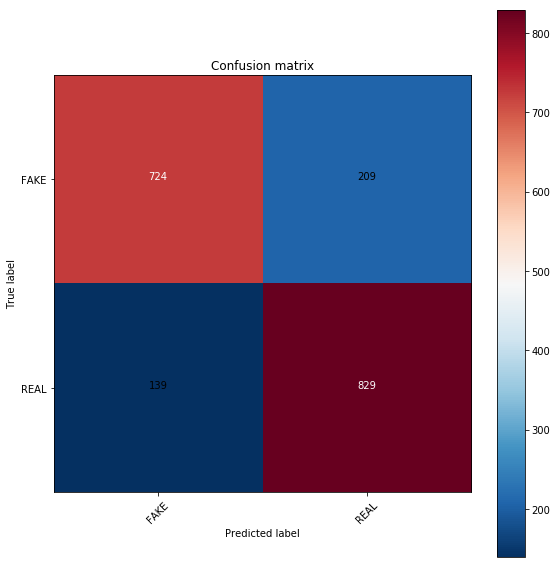

In [39]:
plt.figure(figsize=(8,8))
classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

In [40]:
classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
score

0.8169384534455549

In [41]:
print('precision score: ',precision_score(y_test,pred))

precision score:  0.7986512524084779


In [42]:
print('recall score: ',recall_score(y_test,pred))

recall score:  0.856404958677686


In [43]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.84      0.78      0.81       933
           1       0.80      0.86      0.83       968

    accuracy                           0.82      1901
   macro avg       0.82      0.82      0.82      1901
weighted avg       0.82      0.82      0.82      1901



## Multinomial Naive Bayes with Hyperparameter

In [44]:
classifier=MultinomialNB(alpha=0.1)

In [45]:
previous_score=0
for alpha in np.arange(0,1,0.1):
    sub_classifier=MultinomialNB(alpha=alpha)
    sub_classifier.fit(X_train,y_train)
    y_pred=sub_classifier.predict(X_test)
    score = metrics.accuracy_score(y_test, y_pred)
    if score>previous_score:
        classifier=sub_classifier
    print("Alpha: {}, Accurace Score : {}".format(alpha,score))

C:\Users\apurv\AppData\Roaming\Python\Python37\site-packages\sklearn\naive_bayes.py:512: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


Alpha: 0.0, Accurace Score : 0.8127301420305103
Alpha: 0.1, Accurace Score : 0.8227248816412415
Alpha: 0.2, Accurace Score : 0.823250920568122
Alpha: 0.30000000000000004, Accurace Score : 0.8237769594950026
Alpha: 0.4, Accurace Score : 0.8227248816412415
Alpha: 0.5, Accurace Score : 0.8221988427143608
Alpha: 0.6000000000000001, Accurace Score : 0.8221988427143608
Alpha: 0.7000000000000001, Accurace Score : 0.8216728037874803
Alpha: 0.8, Accurace Score : 0.8195686480799579
Alpha: 0.9, Accurace Score : 0.8174644923724356


In [46]:
## Get Features names
feature_names = cv.get_feature_names()

In [47]:
classifier.coef_[0]

array([ -8.61636537,  -8.91263118,  -8.61636537, ..., -10.08270244,
       -10.08270244, -10.08270244])

In [48]:
### Most real words in the corpus
sorted(zip(classifier.coef_[0], feature_names), reverse=True)[:20]

[(-3.8705417753187206, 'trump'),
 (-4.280584061387371, 'clinton'),
 (-4.645106336355109, 'obama'),
 (-4.81886149974637, 'gop'),
 (-5.008223307213285, 'hillari'),
 (-5.110576997430053, 'donald'),
 (-5.118305011161465, 'donald trump'),
 (-5.18237816348586, 'debat'),
 (-5.305448103075608, 'republican'),
 (-5.343584278266603, 'hillari clinton'),
 (-5.353349980877928, 'say'),
 (-5.393395371570143, 'new'),
 (-5.478643979629032, 'sander'),
 (-5.535867827789305, 'cruz'),
 (-5.661188030583433, 'state'),
 (-5.661188030583433, 'hous'),
 (-5.674629093152451, 'democrat'),
 (-5.674629093152451, 'campaign'),
 (-5.8044942973965625, 'iran'),
 (-5.820022559723118, 'deal')]

In [49]:
### Most fake words in the corpus
sorted(zip(classifier.coef_[0], feature_names))[:20]

[(-10.082702436764434, 'abedin'),
 (-10.082702436764434, 'abedin weiner'),
 (-10.082702436764434, 'abstain'),
 (-10.082702436764434, 'abstain un'),
 (-10.082702436764434, 'abstain un vote'),
 (-10.082702436764434, 'accept foreign'),
 (-10.082702436764434, 'access pipelin'),
 (-10.082702436764434, 'achiev'),
 (-10.082702436764434, 'acquit'),
 (-10.082702436764434, 'across countri'),
 (-10.082702436764434, 'addict'),
 (-10.082702436764434, 'addict info'),
 (-10.082702436764434, 'addict info knowledg'),
 (-10.082702436764434, 'adhd'),
 (-10.082702436764434, 'administr hahaha'),
 (-10.082702436764434, 'admit zika'),
 (-10.082702436764434, 'adopt'),
 (-10.082702436764434, 'advanc mosul'),
 (-10.082702436764434, 'advert'),
 (-10.082702436764434, 'advertis')]

## Logistic Regression

In [62]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV

In [63]:
# Train model with default hyperparameter
clf = LogisticRegression()
clf.fit(X_train, y_train)

print('Accuracy on test set:', clf.score(X_test, y_test))

Accuracy on test set: 0.820620725933719


accuracy:   0.821
Confusion matrix, without normalization


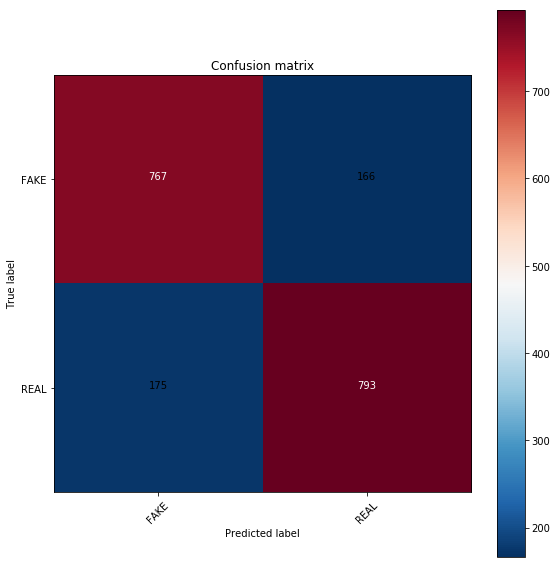

In [64]:
plt.figure(figsize=(8,8))
clf.fit(X_train, y_train)
pred_lr = clf.predict(X_test)
score = metrics.accuracy_score(y_test, pred_lr)
print("accuracy:   %0.3f" % score)
cm_lr = metrics.confusion_matrix(y_test, pred_lr)
plot_confusion_matrix(cm_lr, classes=['FAKE', 'REAL'])

In [65]:
print('precision score: ',precision_score(y_test,pred_lr))

precision score:  0.8269030239833159


In [66]:
print('recall score: ',recall_score(y_test,pred_lr))

recall score:  0.8192148760330579


In [67]:
print(classification_report(y_test,pred_lr))

              precision    recall  f1-score   support

           0       0.81      0.82      0.82       933
           1       0.83      0.82      0.82       968

    accuracy                           0.82      1901
   macro avg       0.82      0.82      0.82      1901
weighted avg       0.82      0.82      0.82      1901



In [68]:
clf.coef_[0]

array([ 0.33220731,  0.085504  ,  0.7120676 , ..., -0.31964687,
       -0.29945742, -0.21223361])

In [69]:
### Most real words in the corpus according to Logistic Regression
sorted(zip(clf.coef_[0], feature_names), reverse=True)[:20]

[(2.3768126540873644, 'gop'),
 (2.2479913479047116, 'netanyahu'),
 (2.204242542083238, 'cruz'),
 (2.0489014785527346, 'sander'),
 (1.8608684509038413, 'debat'),
 (1.8357408425153687, 'iran'),
 (1.814194888067159, 'shoot'),
 (1.7948985539103504, 'baltimor'),
 (1.7760419987597504, 'obama'),
 (1.7184075024676742, 'republican'),
 (1.5714364224005657, 'iowa'),
 (1.5659976356072407, 'convent'),
 (1.5356021893802425, 'polar'),
 (1.5220536748395772, 'boehner'),
 (1.4933972951759875, 'jeb'),
 (1.4589218411547846, 'deleg'),
 (1.4489031107359347, 'primari'),
 (1.4202605221143114, 'tax'),
 (1.4103296142661115, 'bid'),
 (1.4054061529316553, 'kasich')]

In [70]:
### Most fake words in the corpus according to Logistic Regression
sorted(zip(clf.coef_[0], feature_names))[:20]

[(-2.262652973555832, 'comment'),
 (-1.841349106567169, 'break'),
 (-1.6367812575677627, 'comey'),
 (-1.5676972171541879, 'mosul'),
 (-1.5271255146343945, 'podesta'),
 (-1.5185015273888196, 'trump win'),
 (-1.4503075882490886, 'photo'),
 (-1.3931791089804286, 'trump victori'),
 (-1.3670080673504785, 'aleppo'),
 (-1.360756027126517, 'assang'),
 (-1.3433006577483093, 'natur'),
 (-1.341204401532973, 'inform'),
 (-1.3408641426108223, 'russia'),
 (-1.3399870805061516, 'wikileak'),
 (-1.3162402924944059, 'brexit'),
 (-1.248221188004333, 'hillari'),
 (-1.2460079405206785, 'noth'),
 (-1.2138467323516298, 'muslim'),
 (-1.2095046469185917, 'truthfe'),
 (-1.2020598710858665, 'novemb')]

## Support Vector Machine Classifier

In [71]:
from sklearn.svm import SVC

In [78]:
model = SVC(kernel='linear')

model.fit(X_train, y_train)

print('Accuracy on test set:', model.score(X_test, y_test))

Accuracy on test set: 0.8016833245660179


accuracy:   0.802
Confusion matrix, without normalization


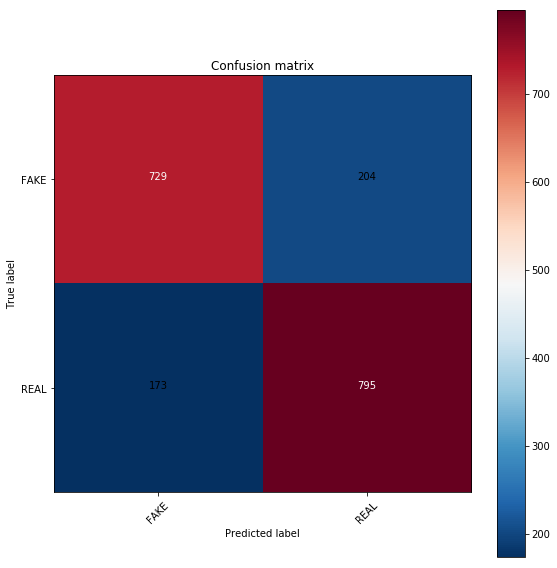

In [79]:
plt.figure(figsize=(8,8))

model.fit(X_train, y_train)
pred_svm = model.predict(X_test)
score = metrics.accuracy_score(y_test, pred_svm)
print("accuracy:   %0.3f" % score)
cm_svm = metrics.confusion_matrix(y_test, pred_svm)
plot_confusion_matrix(cm_svm, classes=['FAKE', 'REAL'])

In [80]:
   print('precision score: ',precision_score(y_test,pred_svm))

precision score:  0.7957957957957958


In [81]:
print('precision score: ',recall_score(y_test,pred_svm))

precision score:  0.8212809917355371


In [82]:
print(classification_report(y_test,pred_svm))

              precision    recall  f1-score   support

           0       0.81      0.78      0.79       933
           1       0.80      0.82      0.81       968

    accuracy                           0.80      1901
   macro avg       0.80      0.80      0.80      1901
weighted avg       0.80      0.80      0.80      1901



In [83]:
model.coef_[0]

array([ 0.52040514,  0.202961  ,  0.63932956, ..., -0.32914059,
       -0.24269196,  0.        ])

In [84]:
### Most real words in the corpus according to SVM
sorted(zip(model.coef_[0], feature_names), reverse=True)[:20]

[(1.8301612364055548, 'netanyahu'),
 (1.5243612537393845, 'appeal'),
 (1.4854011840408998, 'bow'),
 (1.4648271201326062, 'bern'),
 (1.4494559465600922, 'convent'),
 (1.4323883904232977, 'sander'),
 (1.390026908304038, 'iran'),
 (1.378473867433945, 'mcconnel'),
 (1.3734249502997624, 'cruz'),
 (1.368036385524592, 'va'),
 (1.3609220515034814, 'gop'),
 (1.3529581719556636, 'baltimor'),
 (1.3278449823591099, 'place'),
 (1.3129097459564063, 'polar'),
 (1.308962360236646, 'primari'),
 (1.304600804642183, 'islam state'),
 (1.2968473146259338, 'kentucki'),
 (1.2894924097203213, 'egg'),
 (1.2803958106359123, 'shoot'),
 (1.2783599400251031, 'educ')]

In [85]:
### Most real words in the corpus according to SVM
sorted(zip(model.coef_[0], feature_names))[:20]

[(-1.4946110440841278, 'comment'),
 (-1.430270555076722, 'inform'),
 (-1.3783196136870781, 'tehran'),
 (-1.362437081441077, 'assassin'),
 (-1.3602282524886768, 'trump victori'),
 (-1.348770880439245, 'break'),
 (-1.3303533214430328, 'trump famili'),
 (-1.2962519574065534, 'audio'),
 (-1.2905686562829184, 'natur'),
 (-1.2786329412347763, 'bundi'),
 (-1.2565609801813231, 'voter suppress'),
 (-1.2526178641423336, 'intimid'),
 (-1.2475901271065801, 'trump win'),
 (-1.2389744146446273, 'photo'),
 (-1.2231199918441913, 'vote trump'),
 (-1.2013322463815812, 'su'),
 (-1.1995837570521244, 'assang'),
 (-1.1733925861472678, 'technolog'),
 (-1.1595157417690936, 'opinion conserv'),
 (-1.156115820310419, 'ww')]

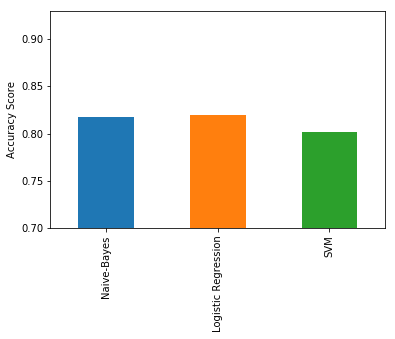

In [86]:
model_accuracy = {
    'Naive-Bayes': 0.817,
    'Logistic Regression': 0.82,
    'SVM': 0.802
}

pd.Series(model_accuracy).plot(kind='bar')
plt.ylabel('Accuracy Score')
plt.ylim((0.70, 0.93));

## Conclusion:-
From the bar graph we can say that Logistic Regression is giving best accuracy of 82%